In [249]:
import numpy as np
import os
import matplotlib.pyplot as plt



# création des listes pour stocker les coordonnées (NTtoD, Fscore)
#std
import numpy as np

db = "G3D"
path = f"C:\workspace2\Datasets\\{db}\expOutMW\\"
# path+="cv\\"
def getFScoreAndNTtoDoFor(deltaIoU=0.0):
    nttod_fscore_list = []
   # parcours des fichiers
    for x in range(1, 11):
        # construction du nom de fichier
        filename = f"wprior{x / 10.0:.1f}/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_{str(deltaIoU)}.txt"

        # if not os.path.exists(path+filename):
        #     filename = f"wprior{x / 10.0:.1f}/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_{str(deltaIoU)}.txt"
        #     print("Only converged does not exist for wprior",x," used normal one")
        # vérification si le fichier existe
        if os.path.exists(path+filename):
            # ouverture du fichier en mode lecture
            with open(path+filename, "r") as f:
                # parcours des lignes
                for line in f:
                    # recherche des scores Fscore et NTtoD
                    if "FScore:" in line:
                        vals = line.split()
                        fscore = float(vals[1])
                        stdFscore = float(vals[-1])
                    elif "NTtoD:" in line:
                        vals = line.split()
                        nttod = float(vals[1])
                        stdNTtoD = float(vals[-1])
                # ajout des coordonnées à la liste correspondante
                nttod_fscore_list.append((nttod, stdNTtoD,fscore, stdFscore,x/10.0,))
        else:
            print(f"{filename} n'existe pas.")
            pass
    return nttod_fscore_list

def prettyPrintForLatexIntegration(nttod_fscore_list):
    #if nttod_fscore_list is a list
    if isinstance(nttod_fscore_list, list):
        for  nttod, stdNTtoD,fscore, stdFscore,wprior in nttod_fscore_list:
            print(wprior)
            print(f" {fscore*100:.1f} \pm {stdFscore*100:.1f} & {nttod*100:.1f} \pm {stdNTtoD*100:.1f} \\\\")
    else:
        nttod, stdNTtoD,fscore, stdFscore = nttod_fscore_list
        print(f" {fscore*100:.1f} \pm {stdFscore*100:.1f} & {nttod*100:.1f} \pm {stdNTtoD*100:.1f} \\\\")


In [250]:
nttod_fscore_list = getFScoreAndNTtoDoFor()
prettyPrintForLatexIntegration(nttod_fscore_list)

0.1
 97.1 \pm 2.6 & 20.0 \pm 5.2 \\
0.2
 99.3 \pm 1.1 & 17.1 \pm 2.2 \\
0.3
 98.3 \pm 1.7 & 15.1 \pm 3.0 \\
0.4
 98.6 \pm 1.8 & 15.0 \pm 4.0 \\
0.5
 98.9 \pm 1.2 & 13.8 \pm 2.5 \\
0.6
 96.5 \pm 1.7 & 12.4 \pm 1.7 \\
0.7
 98.3 \pm 1.7 & 12.3 \pm 2.6 \\
0.8
 98.3 \pm 1.7 & 10.1 \pm 1.0 \\
0.9
 99.0 \pm 1.2 & 10.4 \pm 1.1 \\
1.0
 98.3 \pm 1.1 & 9.6 \pm 1.6 \\


In [252]:
# average std error for fscore
np.average([l[1] for l in nttod_fscore_list])*100

2.4900000000000007

In [237]:
nttod_fscore_list = getFScoreAndNTtoDoFor(deltaIoU=0.0)
prettyPrintForLatexIntegration(nttod_fscore_list)

0.1
 75.7 \pm 1.0 & 20.6 \pm 1.8 \\
0.2
 72.0 \pm 1.3 & 20.1 \pm 1.8 \\
0.3
 71.0 \pm 1.5 & 16.9 \pm 2.8 \\
0.4
 72.0 \pm 1.9 & 14.0 \pm 1.5 \\
0.5
 72.0 \pm 2.0 & 14.4 \pm 2.0 \\
0.6
 71.4 \pm 2.2 & 13.3 \pm 1.0 \\
0.7
 69.3 \pm 2.4 & 10.8 \pm 3.2 \\
0.8
 69.5 \pm 1.4 & 10.5 \pm 1.0 \\
0.9
 66.4 \pm 1.6 & 9.4 \pm 1.5 \\
1.0
 66.8 \pm 2.7 & 8.7 \pm 0.6 \\


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


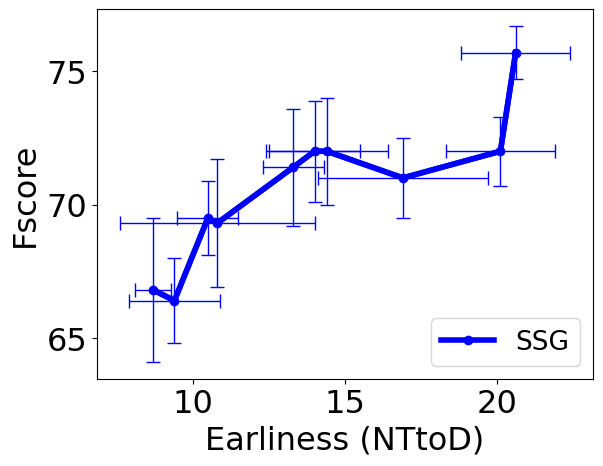

In [238]:


# création de la figure
plt.figure()
plt.rcParams.update({'font.size': 23})
# set the line width of plot higher
plt.rcParams['lines.linewidth'] = 4

# plt.grid(linestyle="-",linewidth=.4)
# min max
# plt.xlim(20.0, 63.0)
# plt.ylim(35.0, 85.0)

# ajout légendes des axes
plt.xlabel("Earliness (NTtoD)")
plt.ylabel("Fscore")

# more labels on x axis
# plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

# nttod_list, fscore_list = getFScoreAndNTtoDoFor(doSSG=False, useSG=False)
# ax.plot(list(map(lambda nt_std:nt_std[0],nttod_list)), list(map(lambda fs_std:fs_std[0],fscore_list)), label="CTC",  color='blue')

# ntto_d__fscore = getFScoreAndNTtoDoFor(True,True)
# ntto_d__fscore = sorted(ntto_d__fscore, key=lambda x: x[0][0])
# nttod_list, fscore_list = ntto_d__fscore
# plt.plot(list(map(lambda nt_std:nt_std[0],nttod_list)), list(map(lambda fs_std:fs_std[0],fscore_list)), label="SSG",  color='orange')
nttod_fscore_list = getFScoreAndNTtoDoFor(deltaIoU=0.0)
nttod_fscore_list = sorted(nttod_fscore_list, key=lambda x: x[0])
plt.plot(list(map(lambda nt_std:nt_std[0]*100,nttod_fscore_list)), list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list)), label="SSG",  color='blue',marker="o")
# plt.plot(list(map(lambda nt_std:nt_std[0]*100,nttod_fscore_list[1:2])), list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list[1:2])),marker="x",markersize=10, color='yellow')
plt.errorbar(list(map(lambda nt_std:nt_std[0]*100,nttod_fscore_list)), list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list)), xerr=list(map(lambda nt_std:nt_std[1]*100,nttod_fscore_list)), yerr= list(map(lambda fs_std:fs_std[3]*100,nttod_fscore_list)), linestyle='-',color='blue',ecolor='blue',capsize=5,elinewidth=1,markeredgewidth=1)

# legend, smaller
plt.legend(fontsize=19,loc='lower right')
# affichage de la figure
# plt.show()
# plt.savefig("../Illustrations/ScoreGraphics/NTtoD_Fscore.pdf", format="pdf",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NTtoD_Fscore.png", format="png",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NTtoD_Fscore.eps", format="eps",bbox_inches='tight')

# Evolution of Earliness and Fscore with the weightPrior variation

In [239]:
iou = 0.0
nttod_fscore_list_SGG = getFScoreAndNTtoDoFor(deltaIoU=iou)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


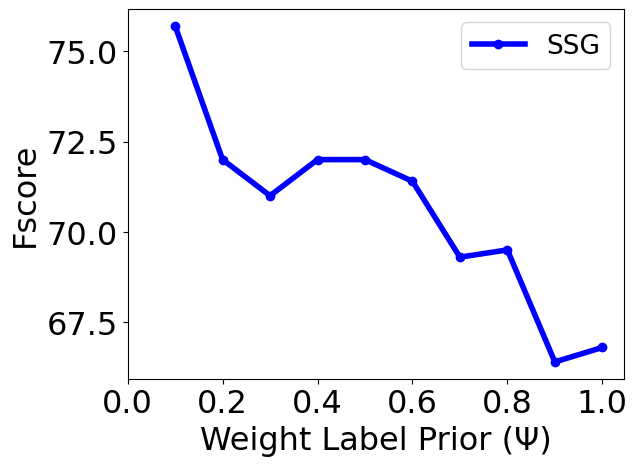

In [240]:
plt.rcParams.update({'font.size': 23})
# set the line width of plot higher
plt.rcParams['lines.linewidth'] = 4
# plot the evolution of the Fscore with the weightPrior, nttod_fscore_list_HGG is the list ordered by weightPrior (from 0 to 1), use it as absciss
plt.plot( list(map(lambda fs_std:fs_std[4],nttod_fscore_list_SGG)), list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list_SGG)), label="SSG",  color='blue',marker="o")
# plt.plot([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list_HGG)), label="HSG",  color='green',marker="o")
# resCTC = list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list_CTC))
# plt.plot([0,0.1,0.2 ,0.3,0.9,1],resCTC[:4]+resCTC[9:] , label="CTC",  color='red',marker="o")
plt.xlabel("Weight Label Prior (Ψ)")
plt.ylabel("Fscore")
# plt.ylim(0,90)

plt.xticks([0,0.2,0.4,0.6,0.8,1])
#legend top right
plt.legend(loc='upper right',fontsize=19)
#error bars
# plt.errorbar([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[2],nttod_fscore_list_SGG)), yerr=list(map(lambda fs_std:fs_std[3],nttod_fscore_list_SGG)), color='blue')
# plt.errorbar([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[2],nttod_fscore_list_HGG)), yerr=list(map(lambda fs_std:fs_std[3],nttod_fscore_list_HGG)), color='green')
# plt.errorbar([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[2],nttod_fscore_list_CTC)), yerr=list(map(lambda fs_std:fs_std[3],nttod_fscore_list_CTC)), color='red')

plt.savefig(f"../Illustrations/ScoreGraphics/{db}_Fscore_wprior.png", format="png",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_Fscore_wprior.eps", format="eps",bbox_inches='tight')

### plot the evolution of the NTtoD with the weightPrior

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


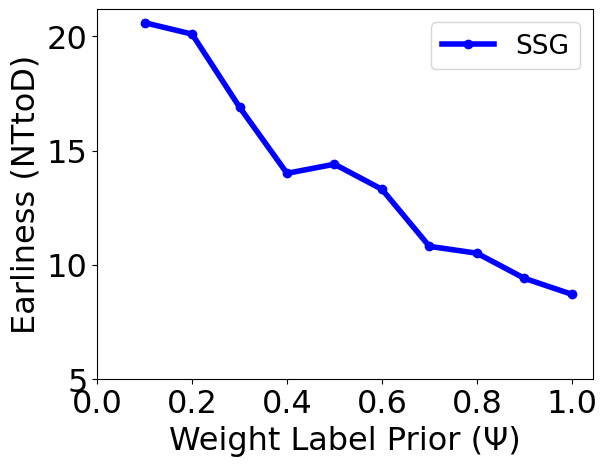

In [241]:
plt.rcParams.update({'font.size': 23})
# set the line width of plot higher
plt.rcParams['lines.linewidth'] = 4
plt.plot(list(map(lambda fs_std:fs_std[4],nttod_fscore_list_SGG)), list(map(lambda fs_std:fs_std[0]*100,nttod_fscore_list_SGG)), label="SSG",  color='blue',marker="o")
# plt.plot([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[0]*100,nttod_fscore_list_HGG)), label="HSG",  color='green',marker="o")
# resCTC = list(map(lambda fs_std:fs_std[0]*100,nttod_fscore_list_CTC))
# plt.plot([0,0.1,0.2 ,0.3,0.9,1],resCTC[:4]+resCTC[9:] , label="CTC",  color='red',marker="o")
# plt.plot([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1][:3], list(map(lambda fs_std:fs_std[0]*100,nttod_fscore_list_CTC[:3])), label="CTC",  color='red',marker="o")

plt.xlabel("Weight Label Prior (Ψ)")
plt.ylabel("Earliness (NTtoD)")
plt.xticks([0,0.2,0.4,0.6,0.8,1])
# plt.yticks([20,40,60,80])
# yticks all 5 units
minNTtod = min(list(map(lambda fs_std:fs_std[0]*100,nttod_fscore_list_SGG)))
maxNTtod = max(list(map(lambda fs_std:fs_std[0]*100,nttod_fscore_list_SGG)))
plt.yticks(np.arange(int(minNTtod)-3, int(maxNTtod)+2, 5))

#legend
plt.legend(fontsize=19)
#error bars
# plt.errorbar([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[0],nttod_fscore_list_SGG)), yerr=list(map(lambda fs_std:fs_std[1],nttod_fscore_list_SGG)), color='blue')
# plt.errorbar([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[0],nttod_fscore_list_HGG)), yerr=list(map(lambda fs_std:fs_std[1],nttod_fscore_list_HGG)), color='green')
# plt.errorbar([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[0],nttod_fscore_list_CTC)), yerr=list(map(lambda fs_std:fs_std[1],nttod_fscore_list_CTC)), color='red')

plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NTtoD_wprior.png", format="png",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NTtoD_wprior.eps", format="eps",bbox_inches='tight')

In [242]:
def extractForJCRNN():
    pathRes = f"C:\workspace2/Datasets/{db}/expOutSMMTVariation/"
    allRes = []
    for fold in os.listdir(pathRes):
        pathResultBOD = pathRes+fold+"/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt"
        # read and scores fscore result
        fscore = -1
        stdDev = -1
        NTtoD = -1
        stdDevNTtoD = -1
        with open(pathResultBOD, 'r') as f:
            for line in f:
                if "FScore:" in line:
                    # format is Fscore : 0.0 +- 0.0
                    fscore = float(line.split(":")[1].split("+-")[0])
                    stdDev = float(line.split(":")[1].split("+-")[1])

        # read and scores NTtoD result
                if "NTtoD:" in line:
                    # format is NTtoD : 0.0 +- 0.0
                    NTtoD = float(line.split(":")[1].split("+-")[0])
                    stdDevNTtoD = float(line.split(":")[1].split("+-")[1])
        # print("fold ",fold," : ",NTtoD," ",stdDevNTtoD," ",fscore," ",stdDev,"")
        allRes.append([NTtoD,stdDevNTtoD,fscore,stdDev])
    return allRes




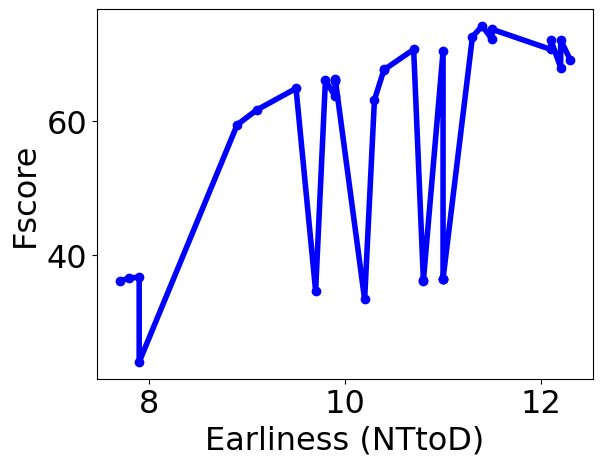

In [243]:

listeResJCRNN = extractForJCRNN()
#filter non nan or 0 values
listeResJCRNN = list(filter(lambda x: x[0] != np.nan and x[2] > 0.01,listeResJCRNN))
plt.figure()

plt.xlabel("Earliness (NTtoD)")

plt.ylabel("Fscore")
#sort by nttod
listeResJCRNN.sort(key=lambda x:x[0])

#get the convex upper values
# listeResJCRNN = list(map(lambda x: [x[0],x[1],x[2],x[3]],listeResJCRNN))
# for i in range(1,len(listeResJCRNN)):
#     if listeResJCRNN[i][2] < listeResJCRNN[i-1][2]:
#         listeResJCRNN[i][2] = listeResJCRNN[i-1][2]
#         listeResJCRNN[i][3] = listeResJCRNN[i-1][3]



plt.plot(list(map(lambda nt_std:nt_std[0]*100,listeResJCRNN)),list(map(lambda nt_std:nt_std[2]*100,listeResJCRNN)),marker="o",color="blue",label="JCRNN")

[[0.077, 0.011, 0.361, 0.12], [0.078, 0.009, 0.366, 0.12], [0.079, 0.009, 0.367, 0.119], [0.089, 0.011, 0.594, 0.08], [0.091, 0.013, 0.616, 0.042], [0.095, 0.013, 0.648, 0.036], [0.098, 0.013, 0.66, 0.028], [0.099, 0.014, 0.661, 0.033], [0.099, 0.014, 0.662, 0.027], [0.104, 0.011, 0.677, 0.024], [0.107, 0.009, 0.706, 0.028], [0.113, 0.012, 0.725, 0.027], [0.114, 0.012, 0.741, 0.019]]


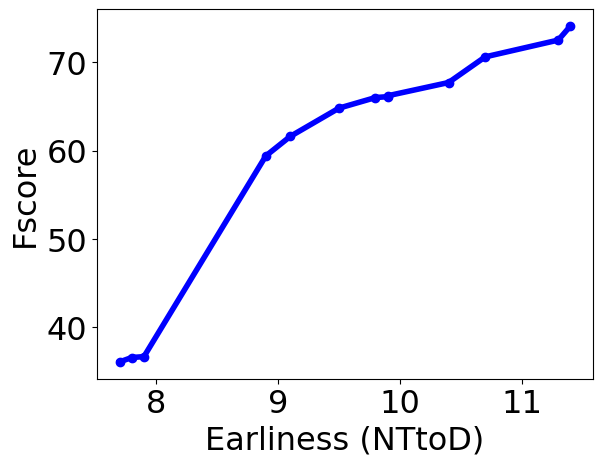

In [244]:
plt.figure()

plt.xlabel("Earliness (NTtoD)")

plt.ylabel("Fscore")
listeResJCRNN_M = extractForJCRNN()
listeResJCRNN_M = list(filter(lambda x: x[0] != np.nan and x[2] > 0.05,listeResJCRNN_M))

#sort by nttod
listeResJCRNN_M.sort(key=lambda x:x[0])

#remove the couples under the convex upper
listeResJCRNN_M = list(map(lambda x: [x[0],x[1],x[2],x[3]],listeResJCRNN_M))
def convexHull(listeRes):
    toRemove = []
    #deep copy
    listeRes = list(map(lambda x: [x[0],x[1],x[2],x[3]],listeRes))
    for i in range(1,len(listeRes)):
        # if listeRes[i][2] < listeRes[i-x][2]: for all x in [1,i]
        for x in range(1,i):
            if listeRes[i][2] < listeRes[i-x][2]:
                toRemove.append(i)
                break

    for i in range(len(toRemove)):
        del listeRes[toRemove[i]-i]
    return listeRes
listeResJCRNN_M = convexHull(listeResJCRNN_M)

print(listeResJCRNN_M)

plt.plot(list(map(lambda nt_std:nt_std[0]*100,listeResJCRNN_M)),list(map(lambda nt_std:nt_std[2]*100,listeResJCRNN_M)),marker="o",color="blue",label="JCRNN")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


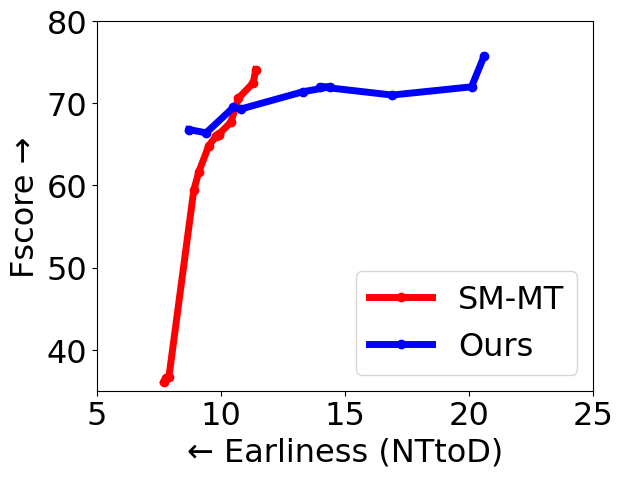

In [248]:
# plot together the two curves (JCRNN and SSG)
plt.figure()

plt.xlabel("← Earliness (NTtoD)")
plt.ylabel("Fscore →")
# get the element with the max fscore of listeResJCRNN_M, letting all the elem
# plt.xlim(5.0, 25.0)
# plt.ylim(35.0, 80.0)

# --- used for G3D :
# maxFscore = max(list(map(lambda nt_std:nt_std[2],listeResJCRNN_M)))
# maxFscoreIndex = list(map(lambda nt_std:nt_std[2],listeResJCRNN_M)).index(maxFscore)
# print(maxFscoreIndex)
# listeResJCRNN_M = listeResJCRNN_M[maxFscoreIndex:maxFscoreIndex+1]
# --- end used for G3D
plt.plot(list(map(lambda nt_std:nt_std[0]*100,listeResJCRNN_M)),list(map(lambda nt_std:nt_std[2]*100,listeResJCRNN_M)),marker="o",color="red",label="SM-MT",linewidth=5)
# plt.errorbar(list(map(lambda nt_std:nt_std[0]*100,listeResJCRNN_M)), list(map(lambda fs_std:fs_std[2]*100,listeResJCRNN_M)), xerr=list(map(lambda nt_std:nt_std[1]*100,listeResJCRNN_M)), yerr= list(map(lambda fs_std:fs_std[3]*100,listeResJCRNN_M)), linestyle='-',color='red',ecolor='red',capsize=5,elinewidth=0.05,markeredgewidth=0.2,alpha=0.5)

listeResSSG = getFScoreAndNTtoDoFor()
# sort by earliness
# listeResSSG.sort(key=lambda x:x[0])
# listeResSSG = convexHull(listeResSSG)
plt.plot(list(map(lambda nt_std:nt_std[0]*100,listeResSSG)),list(map(lambda nt_std:nt_std[2]*100,listeResSSG)),marker="o",color="blue",label="Ours",linewidth=5)
# transparent error bar with parameter alpha
# plt.errorbar(list(map(lambda nt_std:nt_std[0]*100,listeResSSG)), list(map(lambda fs_std:fs_std[2]*100,listeResSSG)), xerr=list(map(lambda nt_std:nt_std[1]*100,listeResSSG)), yerr= list(map(lambda fs_std:fs_std[3]*100,listeResSSG)), linestyle='--',color='blue',ecolor='blue',capsize=5,elinewidth=0.05,markeredgewidth=0.2,alpha=0.5)

plt.legend()
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NTtoD_Fscore_SM-MT_vs_ours.png", format="png",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NTtoD_Fscore_SM-MT_vs_ours.eps", format="eps",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NTtoD_Fscore_SM-MT_vs_ours.pdf", format="pdf",bbox_inches='tight')